In [1]:
#Data analysis libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore')

# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay,accuracy_score
from sklearn.metrics import  precision_recall_curve, precision_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#preprocess libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#RFE
from sklearn.feature_selection import RFE
#C-B
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#F-importance
from sklearn.ensemble import RandomForestClassifier
#MUTUAL-info
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import  Scatter
py.init_notebook_mode(connected=True)
from matplotlib import legend
import random
from sklearn.impute import SimpleImputer

#Data Loading

In [104]:
# downlaod from UCI repository
data= pd.read_csv('/content/water_potability.csv')

#Data Wrangling

In [ ]:
data.shape

(3276, 10)

In [ ]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
data.duplicated().sum()

0

In [3]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.isnull().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

#Data Proccessing

In [4]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

#Data Visualization

..............

#Correlation

In [ ]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
pd.DataFrame(corr_array)

0         1         2         3         4         5         6  \
0  1.000000  0.082096 -0.089288 -0.034350  0.018203  0.018614  0.043503   
1  0.082096  1.000000 -0.046899 -0.030054 -0.106923 -0.023915  0.003610   
2 -0.089288 -0.046899  1.000000 -0.070148 -0.171804  0.013831  0.010242   
3 -0.034350 -0.030054 -0.070148  1.000000  0.027244 -0.020486 -0.012653   
4  0.018203 -0.106923 -0.171804  0.027244  1.000000 -0.016121  0.030831   
5  0.018614 -0.023915  0.013831 -0.020486 -0.016121  1.000000  0.020966   
6  0.043503  0.003610  0.010242 -0.012653  0.030831  0.020966  1.000000   
7  0.003354 -0.013013 -0.009143  0.017084 -0.030274  0.001285 -0.013274   
8 -0.039057 -0.014449  0.019546  0.002363 -0.011187  0.005798 -0.027308   
9 -0.003556 -0.013837  0.033743  0.023779 -0.023577 -0.008128 -0.030001   

          7         8         9  
0  0.003354 -0.039057 -0.003556  
1 -0.013013 -0.014449 -0.013837  
2 -0.009143  0.019546  0.033743  
3  0.017084  0.002363  0.023779  
4 -0.030274 -0.011187 -0.023577  
5  0.001285  0.005798 -0.008128  
6 -0.013274 -0.027308 -0.030001  
7  1.000000 -0.022145  0.007130  
8 -0.022145  1.000000  0.001581  
9  0.007130  0.001581  1.000000

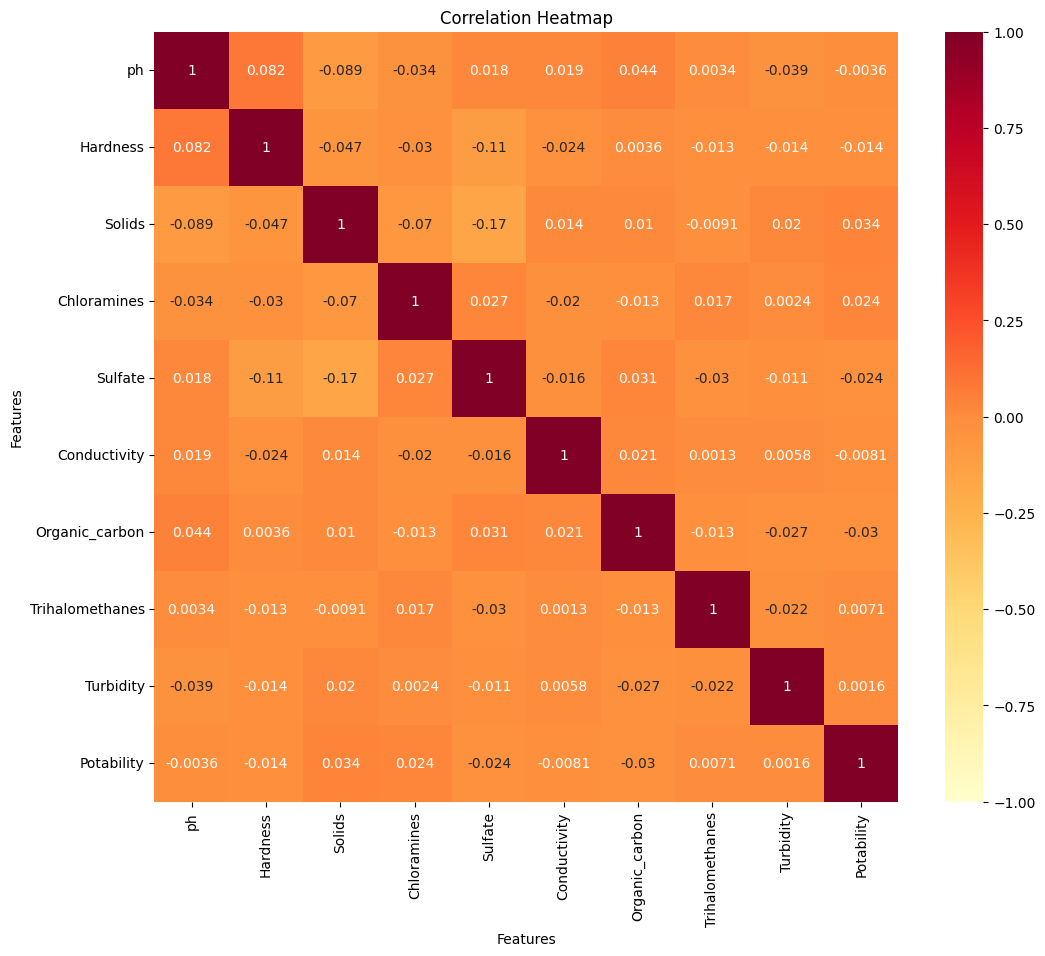

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_array, annot=True, cmap='YlOrRd', vmin=-1, vmax=1,
xticklabels=data.columns, yticklabels=data.columns)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#Removing Outliers

In [5]:
#finding skew of data
dskew=data.drop(['Potability'],axis=1)
pd.DataFrame(dskew.skew())

0
ph               0.025630
Hardness        -0.039342
Solids           0.621634
Chloramines     -0.012098
Sulfate         -0.035947
Conductivity     0.264490
Organic_carbon   0.025533
Trihalomethanes -0.083031
Turbidity       -0.007817

____________________________________________________________________________________________________


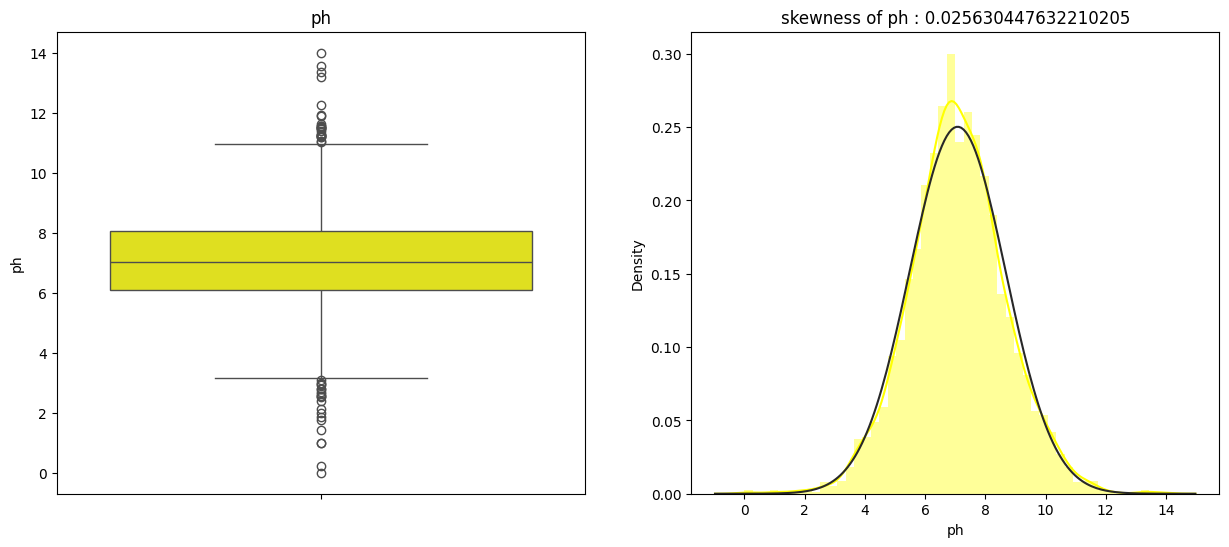

____________________________________________________________________________________________________


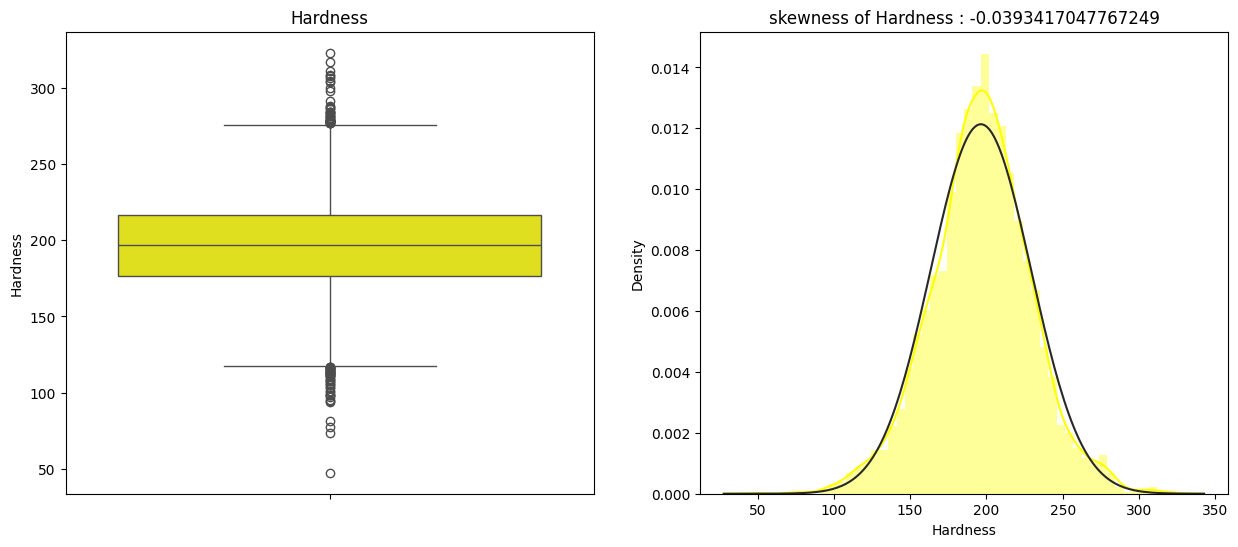

____________________________________________________________________________________________________


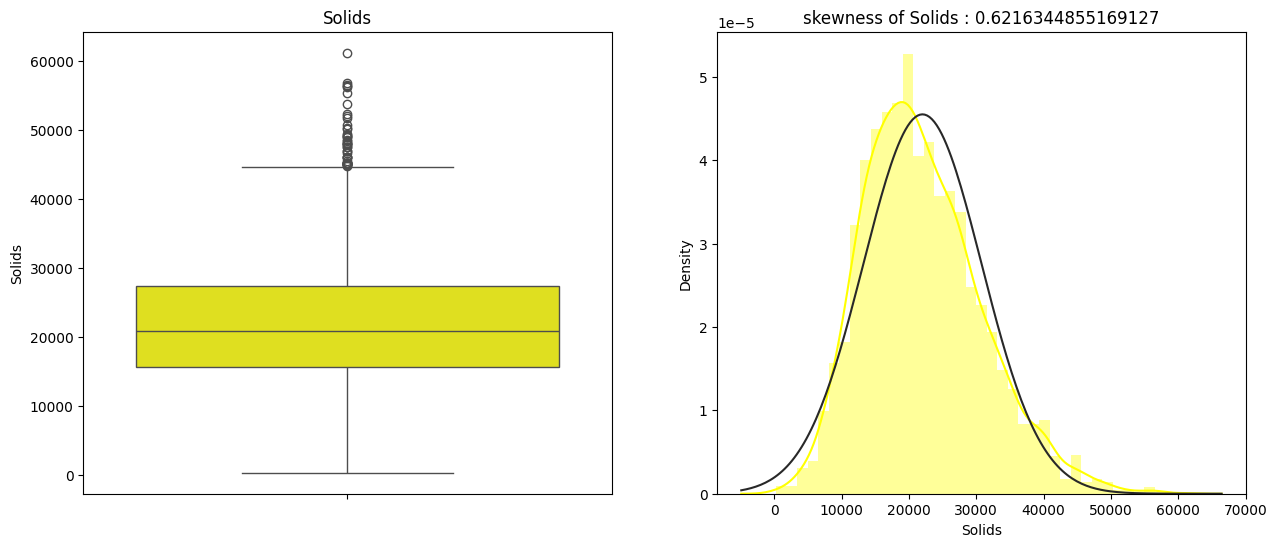

____________________________________________________________________________________________________


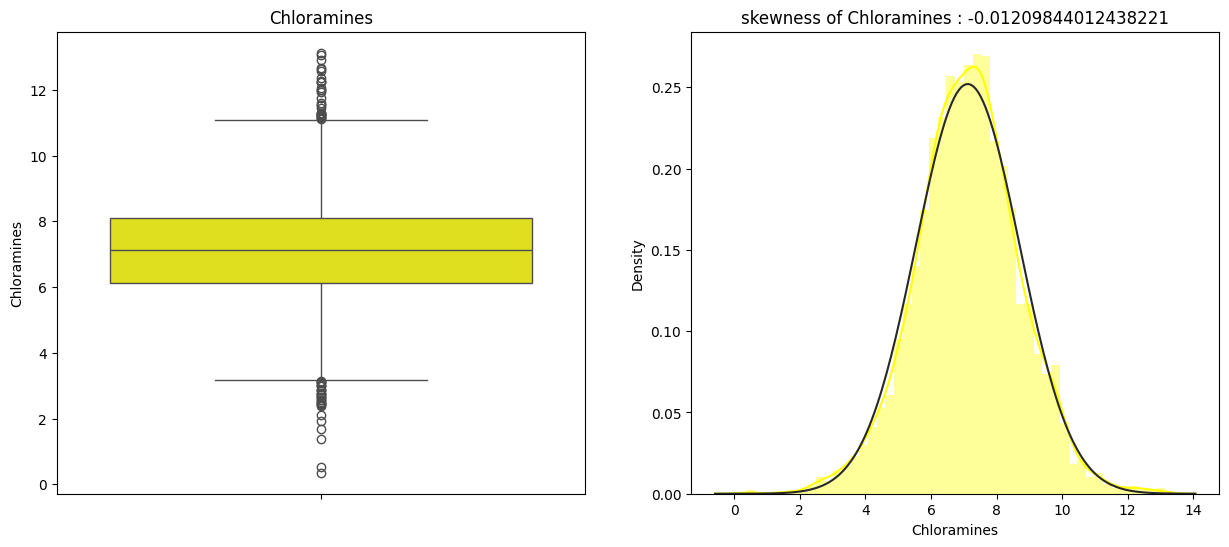

____________________________________________________________________________________________________


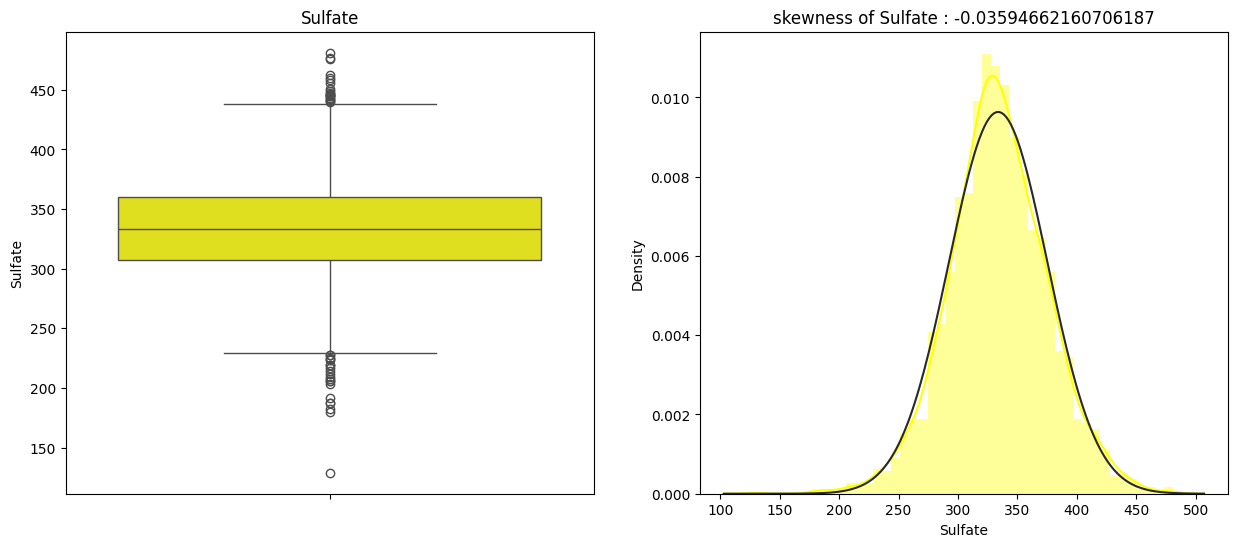

____________________________________________________________________________________________________


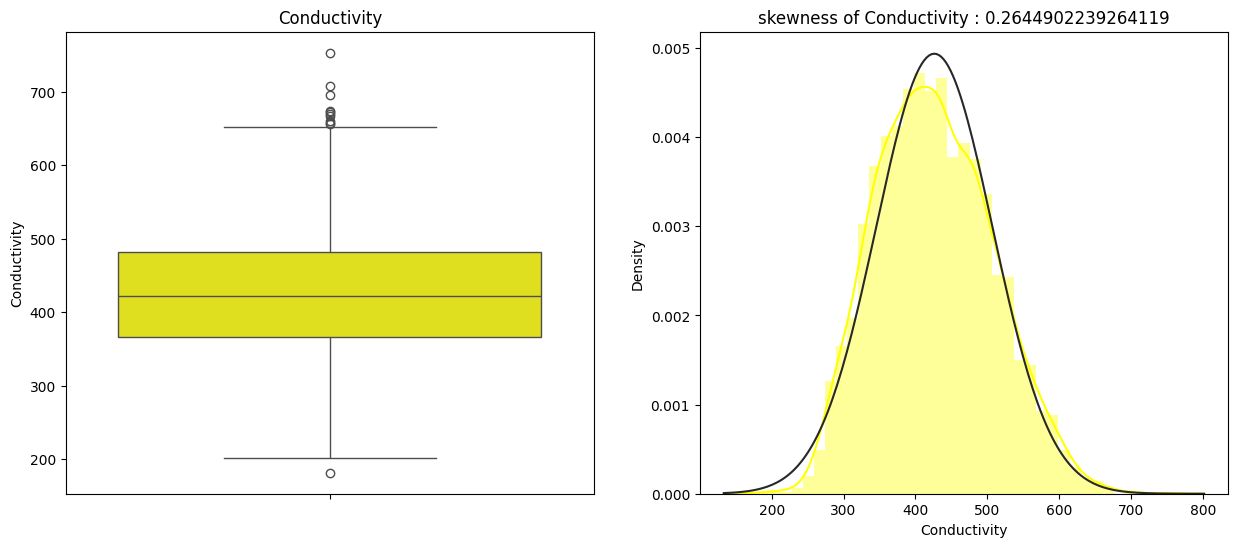

____________________________________________________________________________________________________


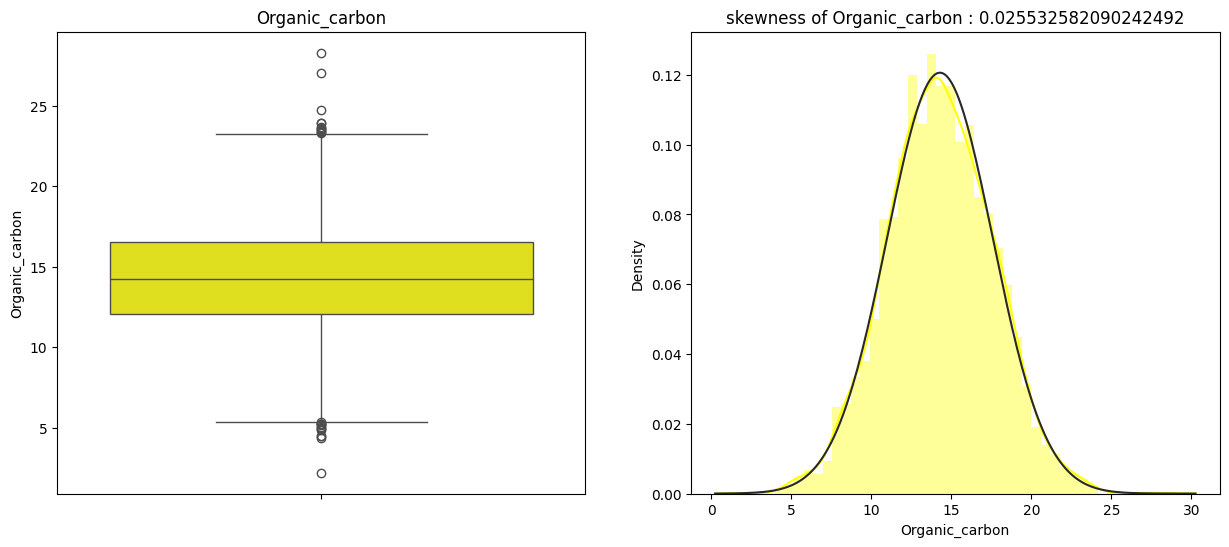

____________________________________________________________________________________________________


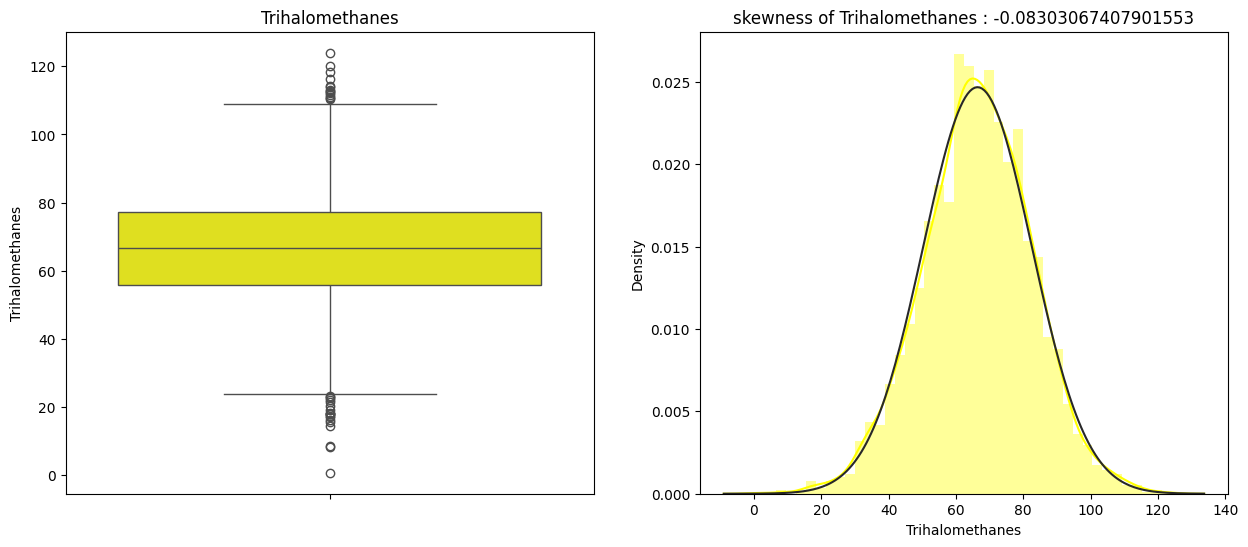

____________________________________________________________________________________________________


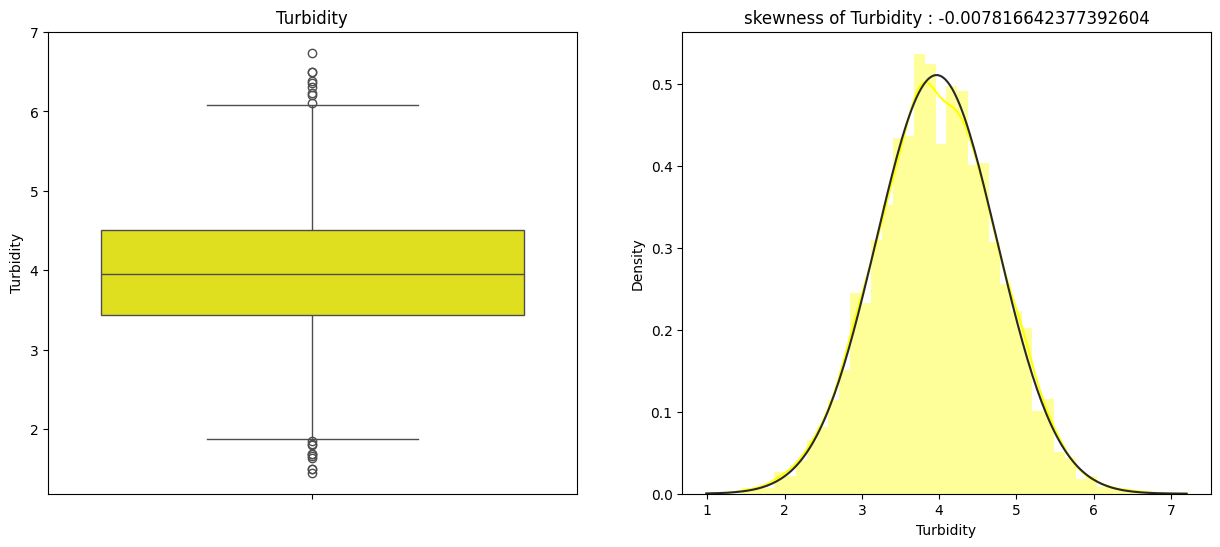

____________________________________________________________________________________________________


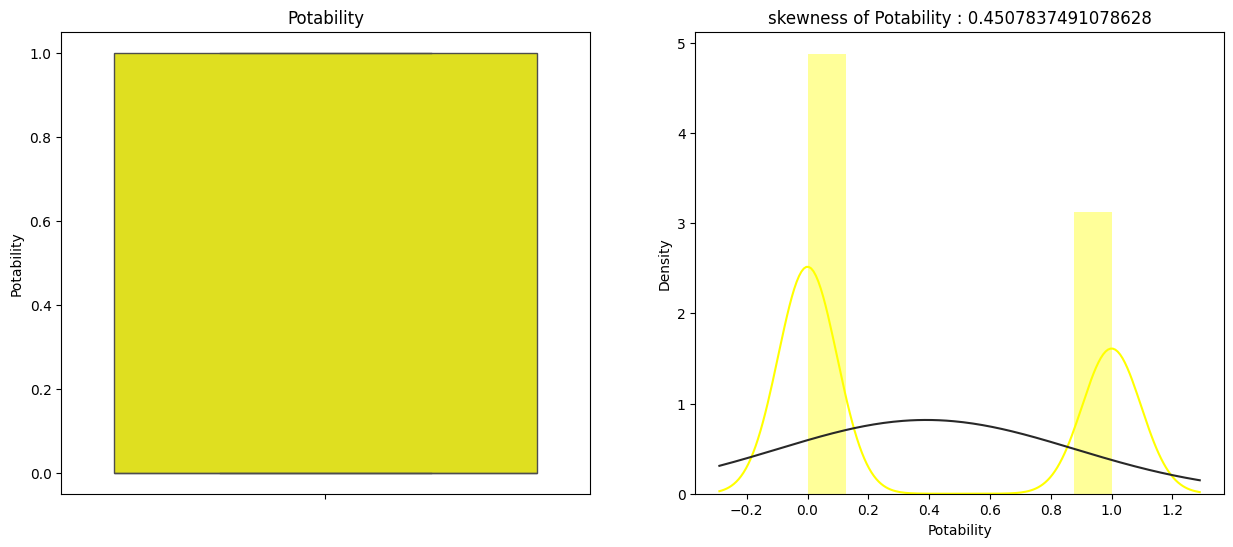

In [8]:
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in data.columns if var not in ["protability"]]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=data[var], color = 'yellow')
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(data[var], fit=norm, color = 'yellow')
    ax.set_title(f'skewness of {var} : {data[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [105]:
# Using Inter Quartile Range for removing outliers from numerical variables
# Defining outlier features
outlier_var=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1

    # Defining upper and lower limit
    lower_limit = data[i].quantile(0.25)-1.5*IQR
    upper_limit = data[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    data.loc[(data[i] > upper_limit),i] = upper_limit
    data.loc[(data[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


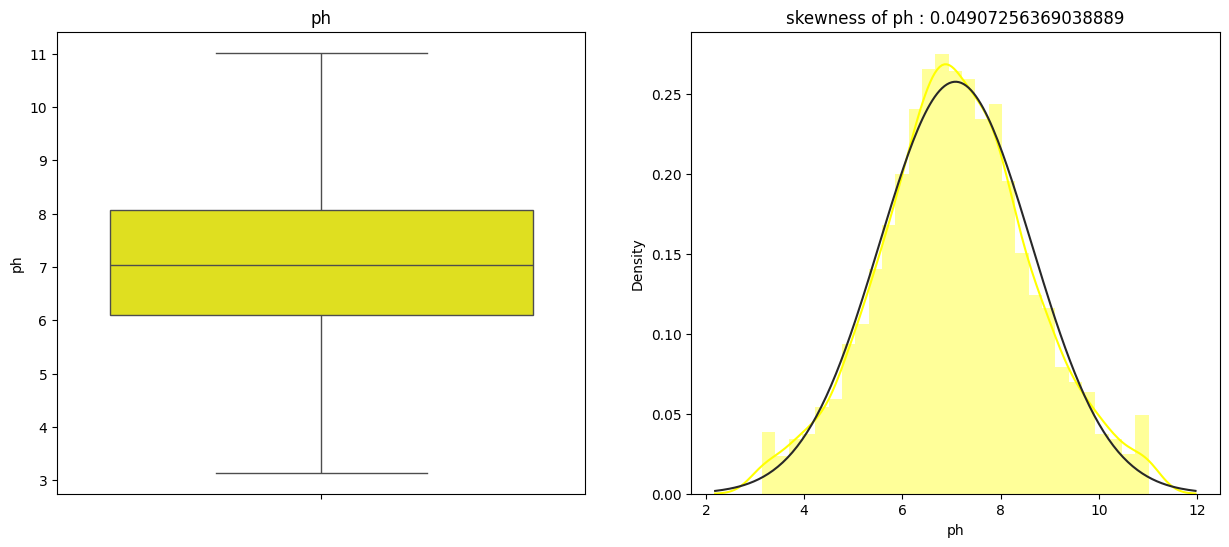

____________________________________________________________________________________________________


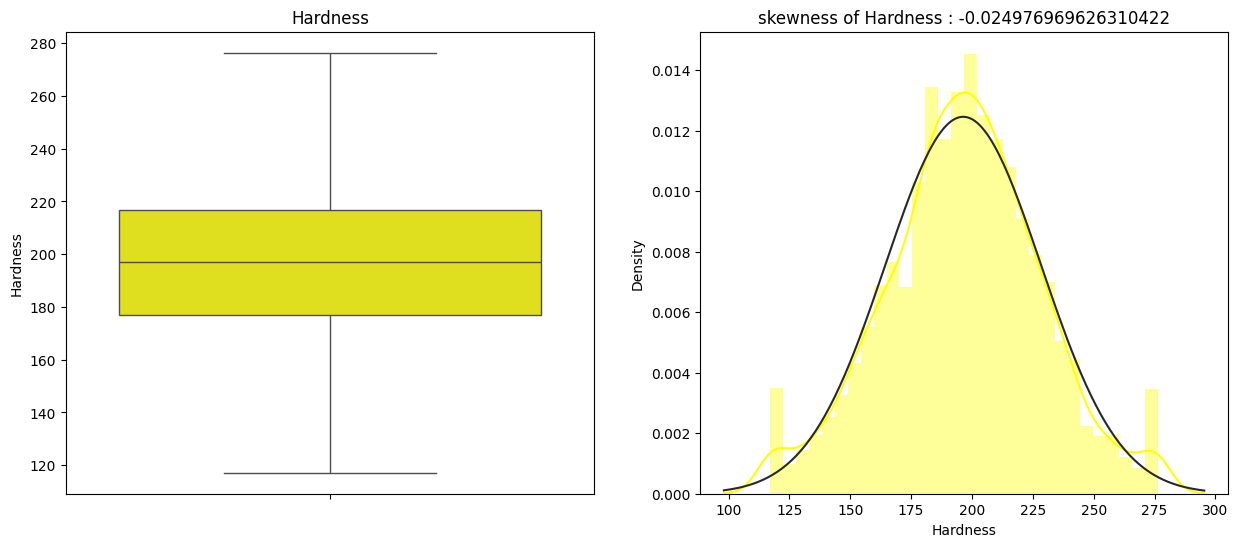

____________________________________________________________________________________________________


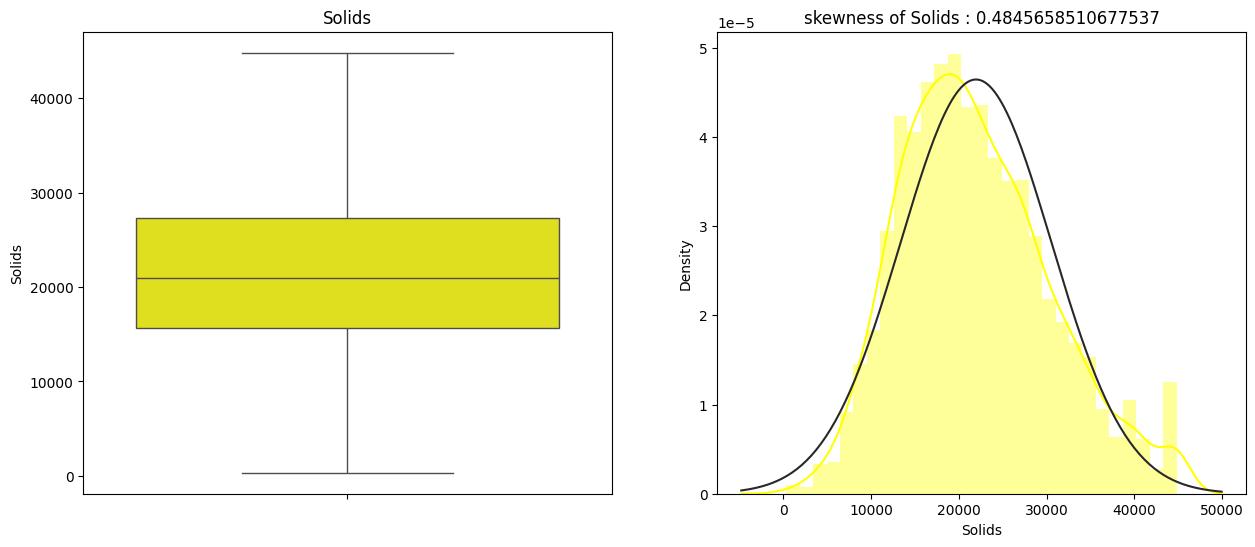

____________________________________________________________________________________________________


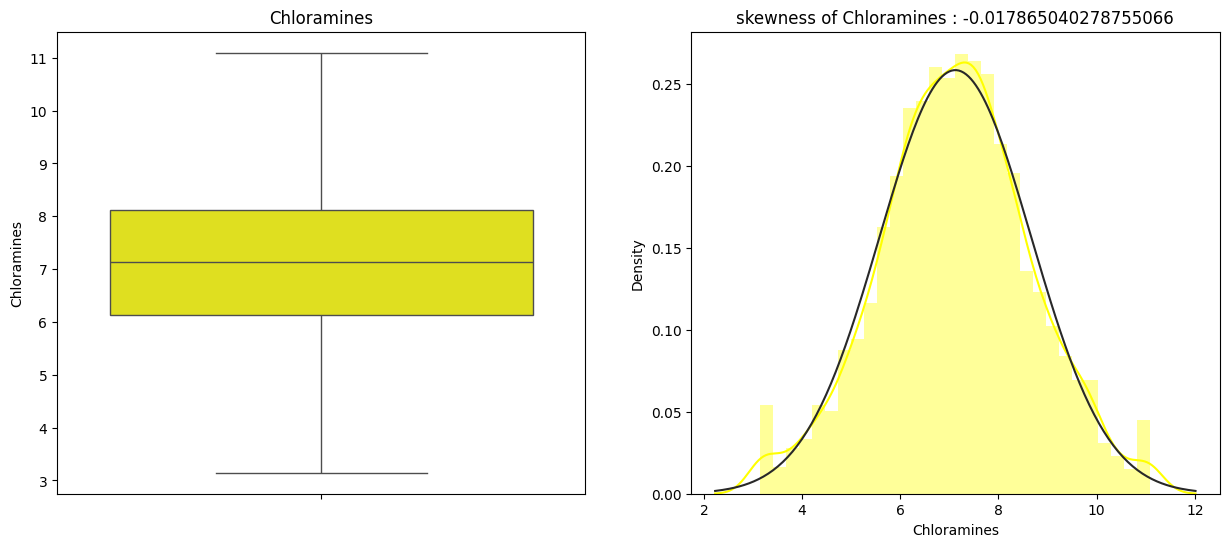

____________________________________________________________________________________________________


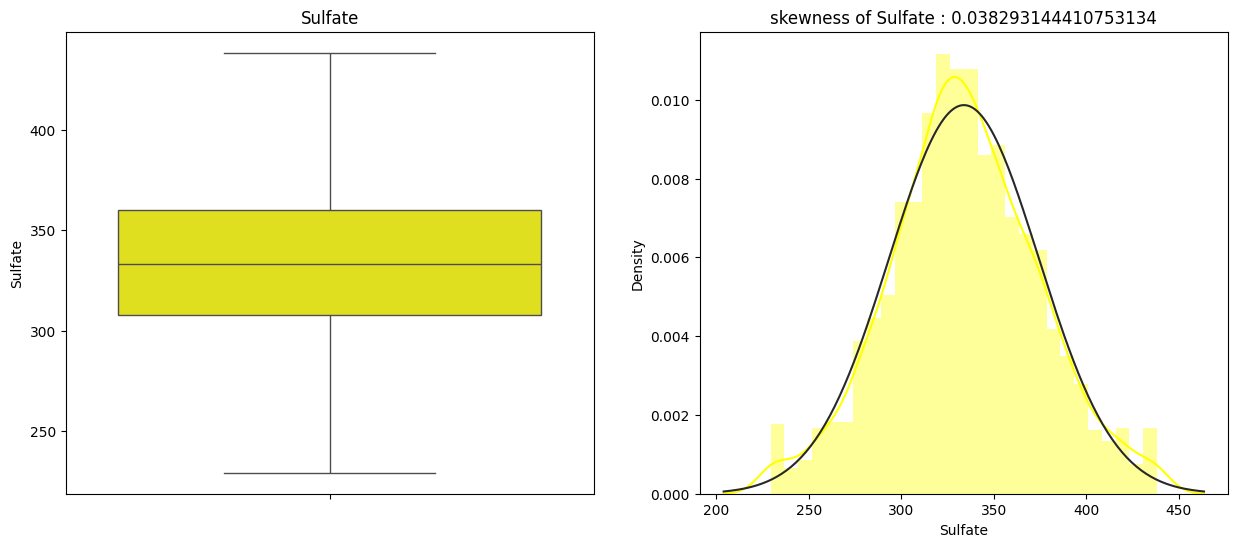

____________________________________________________________________________________________________


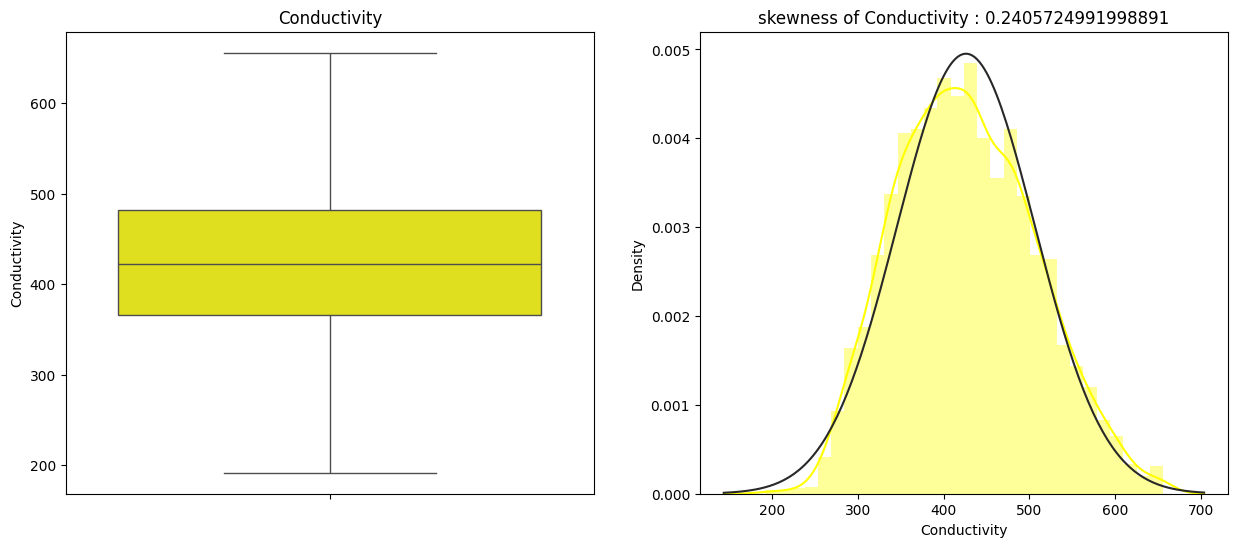

____________________________________________________________________________________________________


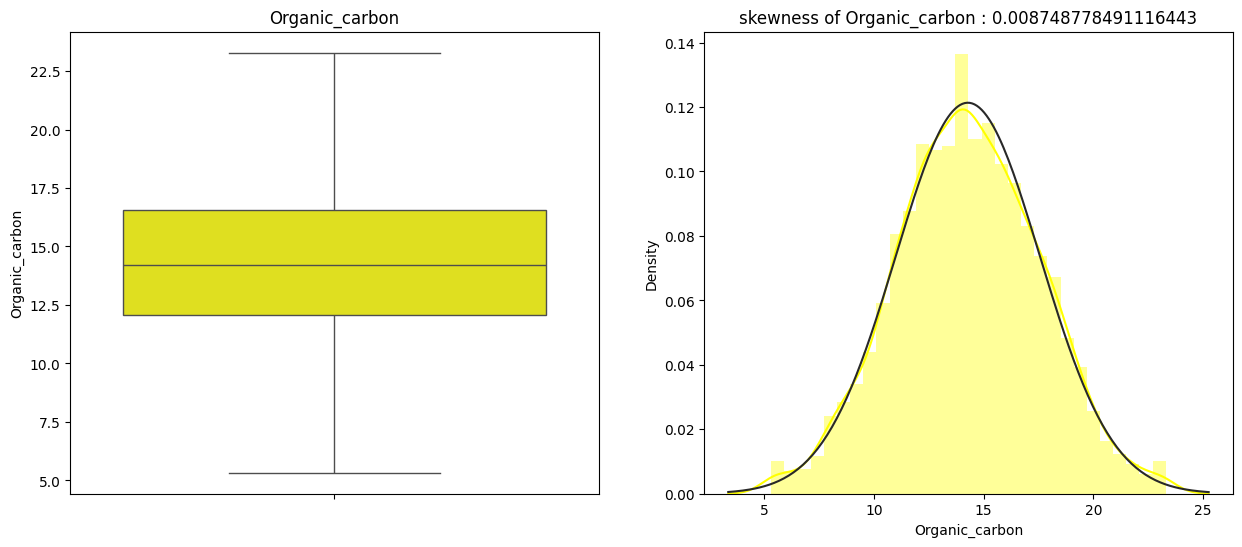

____________________________________________________________________________________________________


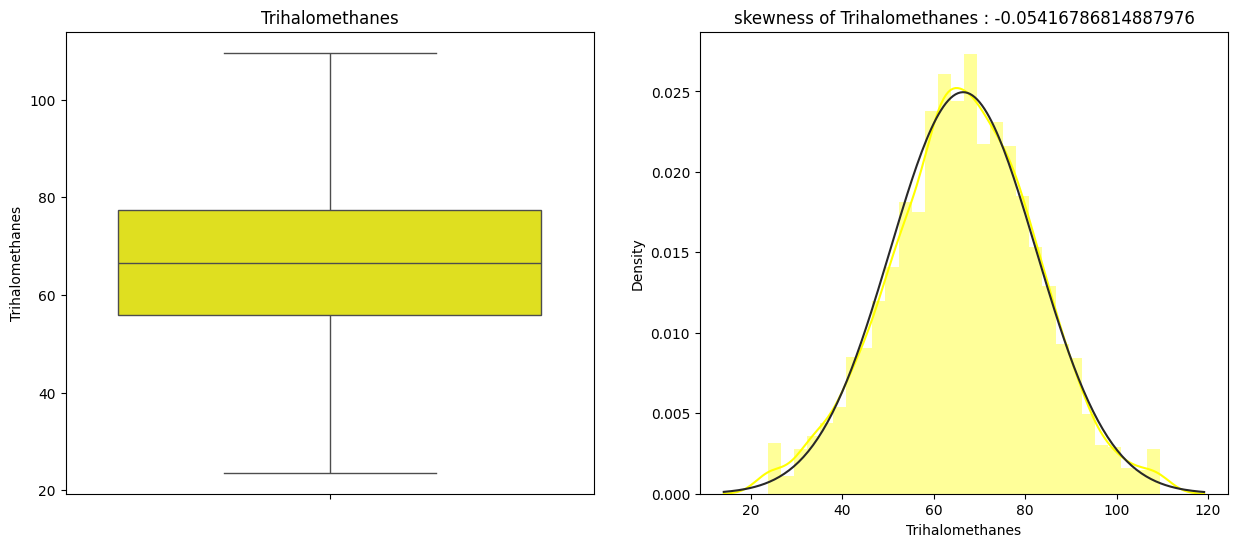

____________________________________________________________________________________________________


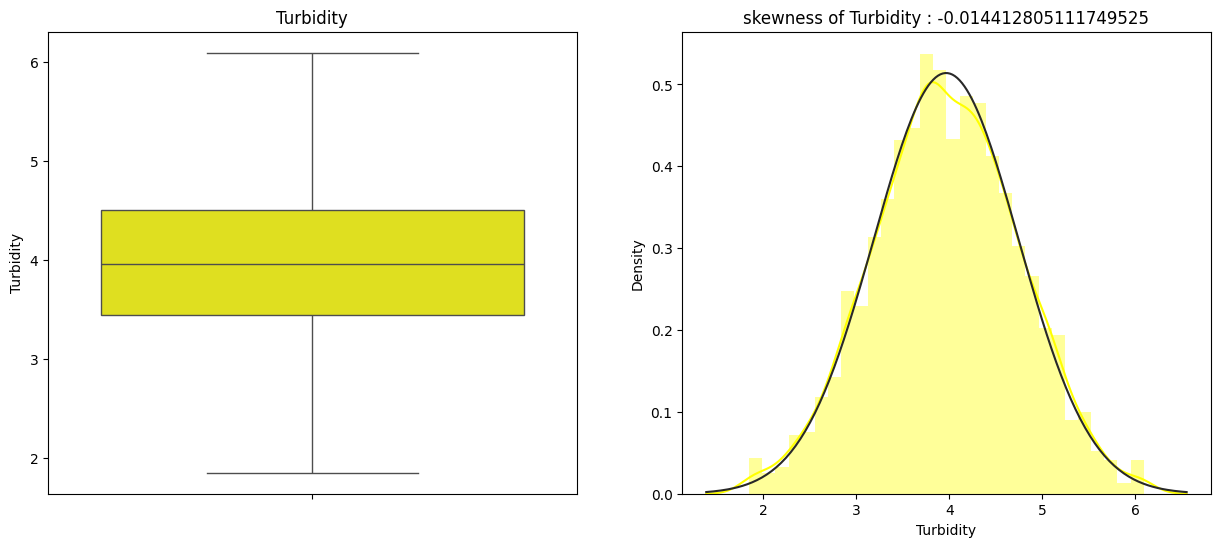

In [10]:
from scipy.stats import norm
for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=data[var], color = 'yellow')
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(data[var], fit=norm, color = 'yellow')
    ax.set_title(f'skewness of {var} : {data[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

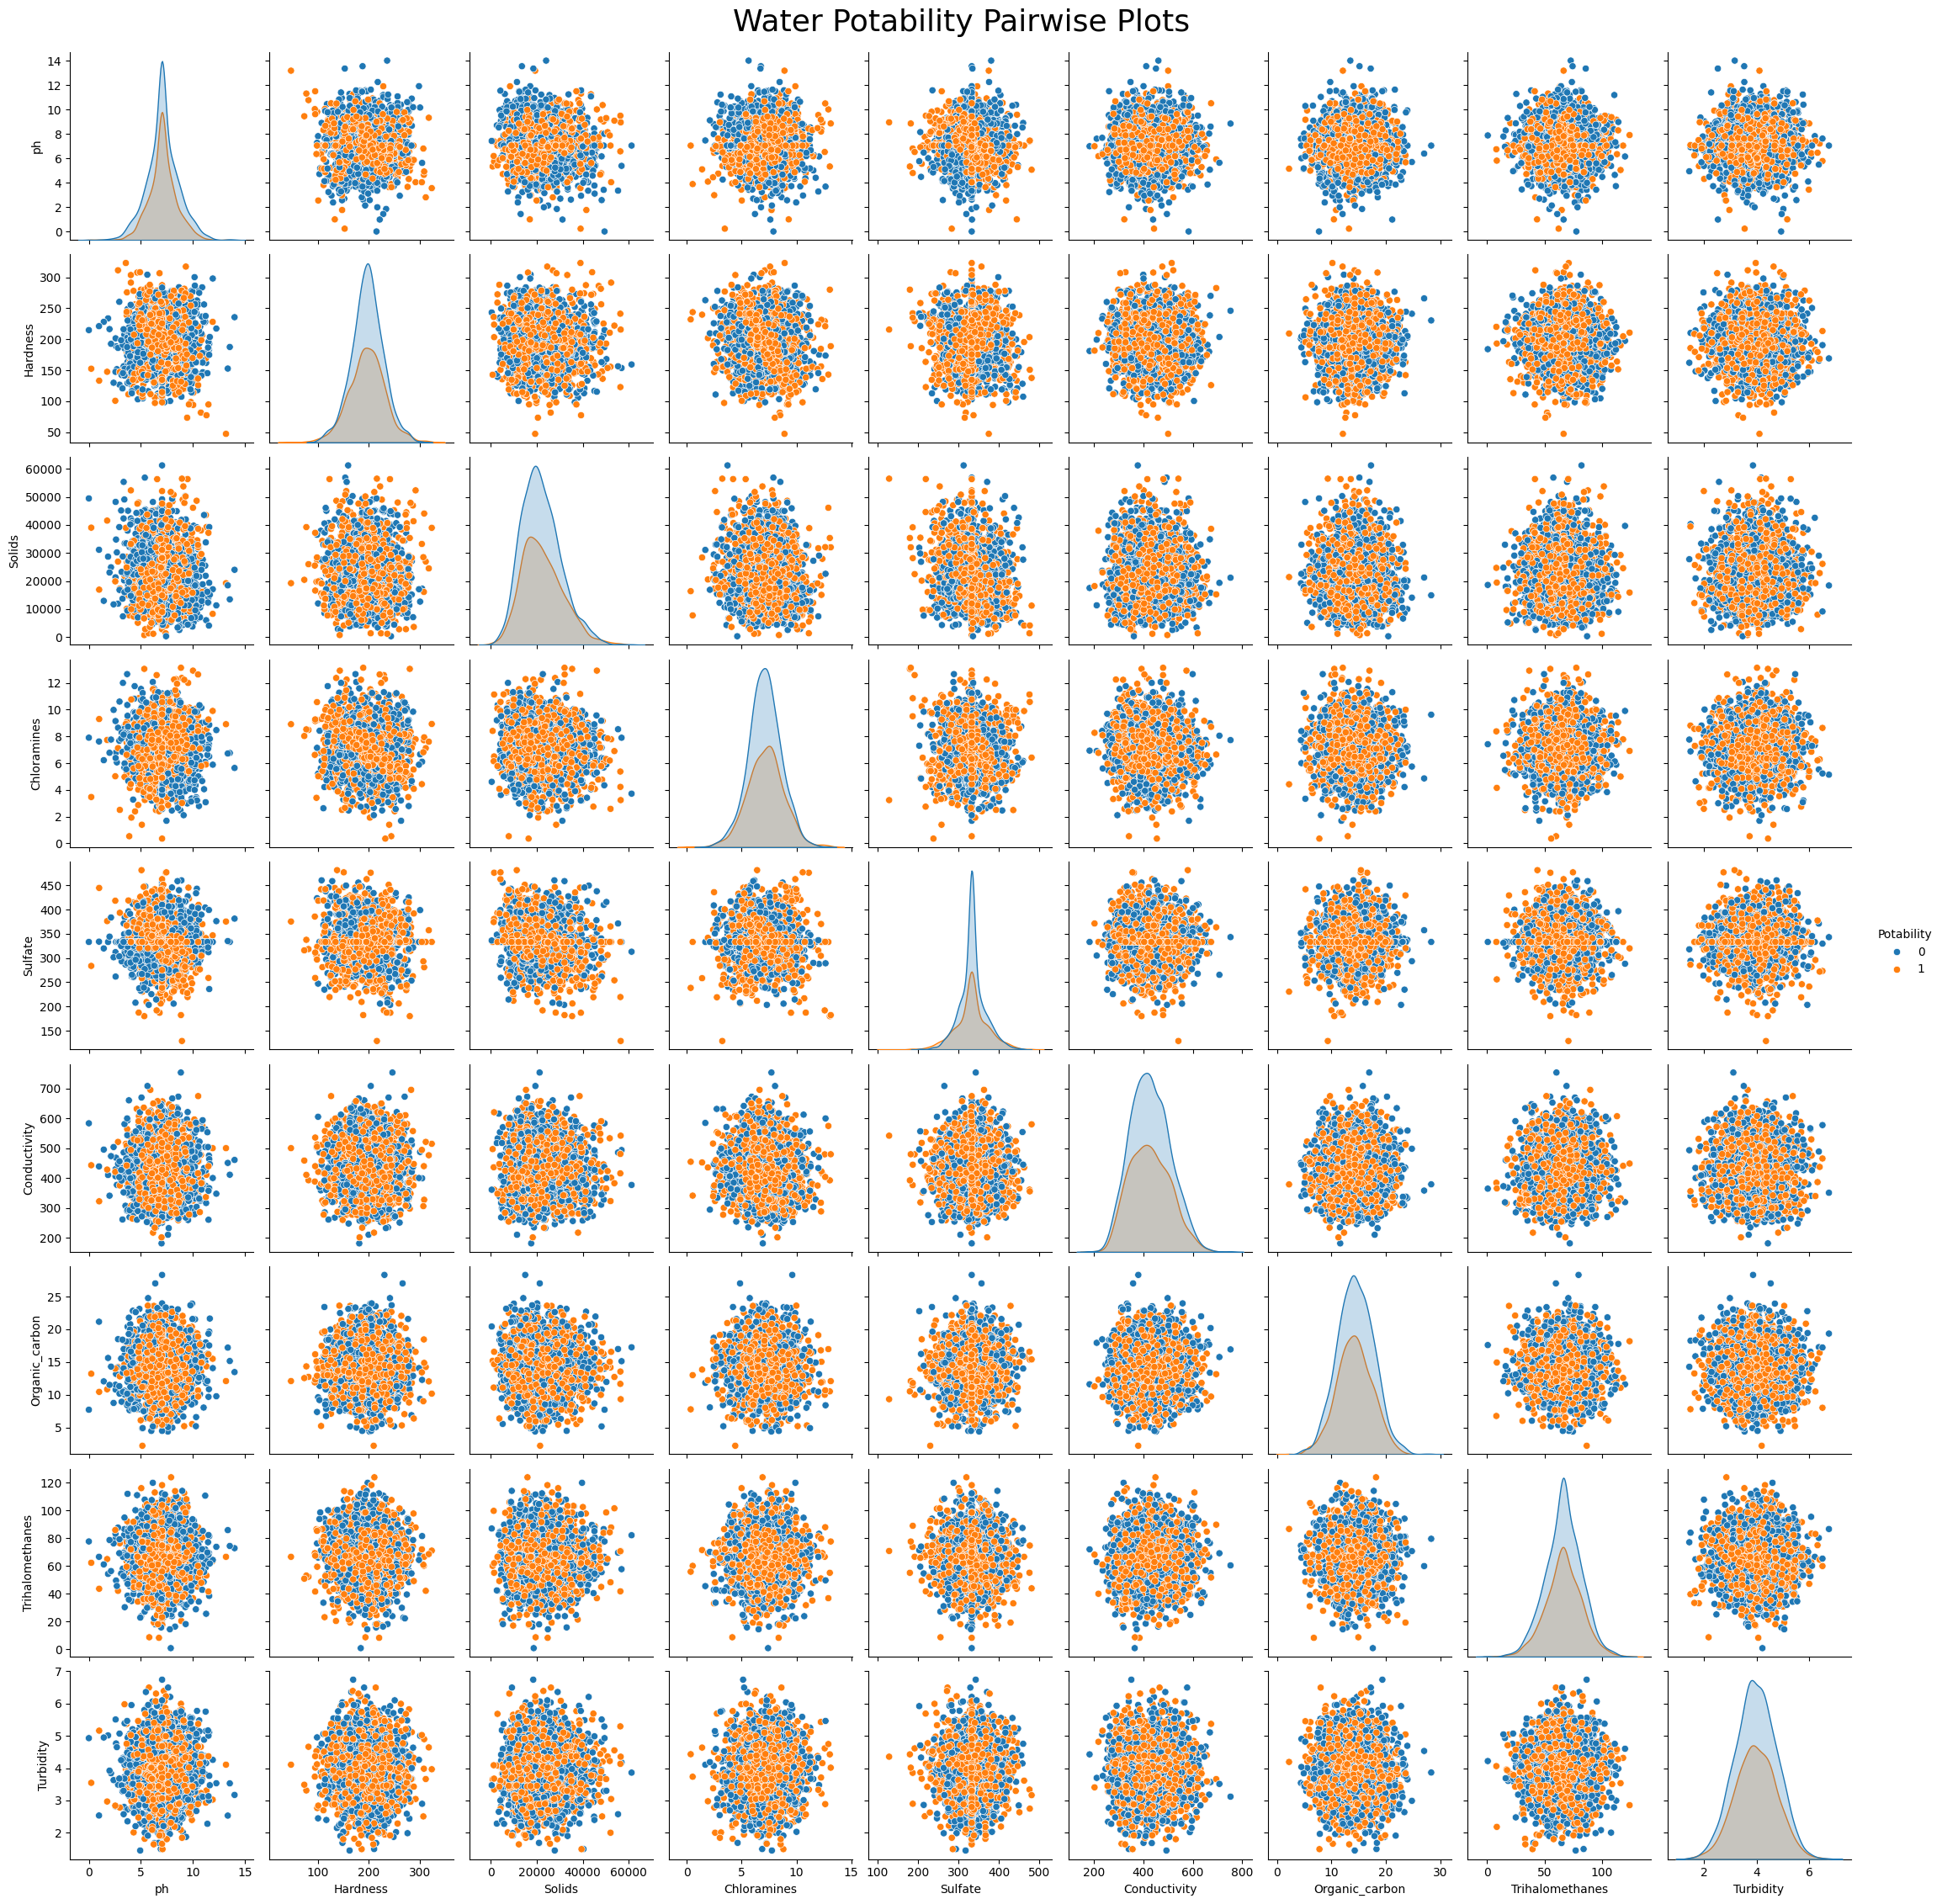

In [ ]:
pairplot1 = sns.pairplot(data, hue='Potability')
pairplot1.fig.suptitle("Water Potability Pairwise Plots",fontsize=26, y=1.01);

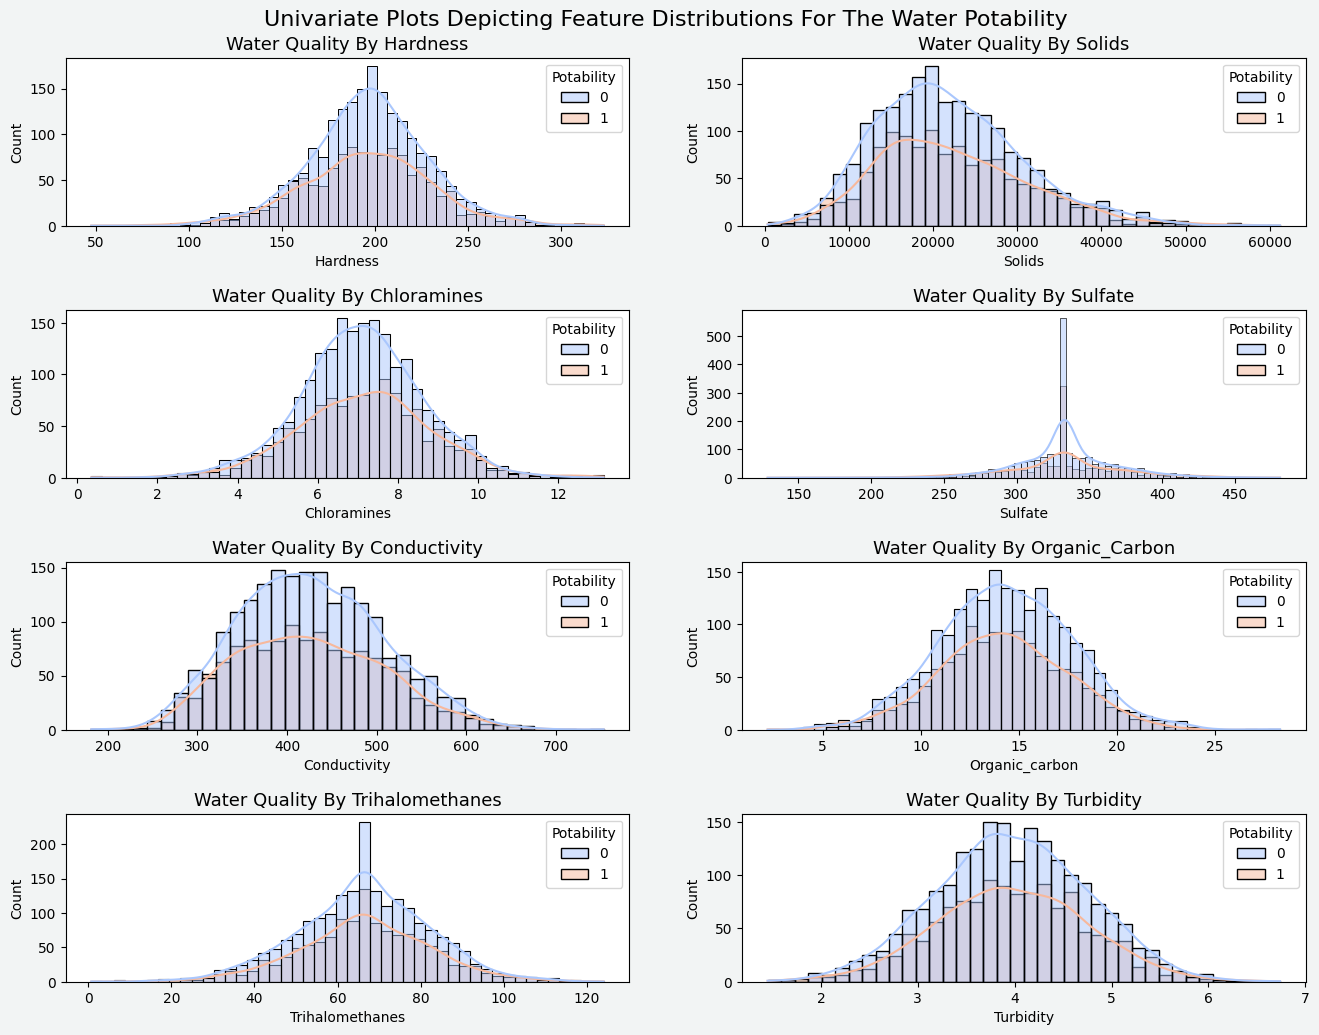

In [ ]:
fig, ax = plt.subplots(figsize=(16,12), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count=1
for i in data.columns[1:-2]:
    plt.subplot(4,2,count)
    h = sns.histplot(x=i, kde=True,data=data,hue='Potability',palette='coolwarm')
    h.set_title(('water quality by ' + i).title(), fontsize=13)
    count+=1
fig.suptitle(('Univariate plots depicting feature distributions for the water potability').title(),
             x=0.5, y=0.92, fontsize=16);

#Handling the missing values

In [ ]:
data.shape

(3276, 10)

In [22]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               3276 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          3276 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3276 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   int64   
 10  ph_category      3276 non-null   category
dtypes: category(1), float64(9), int64(1)
memory usage: 259.4 KB


In [106]:
imputer = SimpleImputer(strategy='median')
data['ph'] = pd.DataFrame(imputer.fit_transform(data['ph'].values.reshape(-1, 1)))

In [107]:
data['Sulfate'] = pd.DataFrame(imputer.fit_transform(data['Sulfate'].values.reshape(-1, 1)))

In [108]:
data['Trihalomethanes'] = pd.DataFrame(imputer.fit_transform(data['Trihalomethanes'].values.reshape(-1, 1)))

In [109]:
# 1. Normalization
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
data['ph_category'] = scaler.fit_transform(data[['ph']])

In [110]:
data['ph_category'] = data['ph'].apply(lambda value: 'acidic level' if value < 6.5 else 'alkaline level' if value > 8.5 else 'normal pH_surface water')
data['ph_category'] = pd.Categorical(data['ph_category'], categories=['acidic level', 'alkaline level', 'normal pH_surface water'])

In [111]:
encoder = OneHotEncoder(sparse=False)
pH_encoded = encoder.fit_transform(data[['ph_category']])
pH_encoded_data = pd.DataFrame(pH_encoded, columns=encoder.get_feature_names_out(['ph_category']))
data = pd.concat([data, pH_encoded_data], axis=1)

In [125]:
data = data.drop(columns= 'ph_category', axis =1);

In [126]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'ph_category_acidic level', 'ph_category_alkaline level',
       'ph_category_normal pH_surface water'],
      dtype='object')

In [127]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       10.379783        86.990970   2.963135           0   
1       15.180013        56.329076   4.500656           0   
2       16.868637        66.420093   3.055934           0   
3       18.436524       100.341674   4.628771           0   
4       11.558279        31.997993   4.075075           0   

   ph_category_acidic level  ph_category_alkaline level  \
0                       0.0                         0.0   
1                       1.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         1.0   

   ph_category_normal pH_surface water  
0                                  1.0  
1                                  0.0  
2                                  1.0  
3                                  1.0  
4                                  0.0

#Train-Test-split

In [128]:
# Load the protability dataset
x=data.drop(columns = 'Potability')
y=data['Potability']

# Stratified split into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 18)

#Scaling the Model

In [129]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)
x_train

array([[-1.48139904e+00,  7.84379469e-01, -1.23721760e-04, ...,
         1.55312665e+00, -4.28706619e-01, -1.10929921e+00],
       [-4.04841555e-02,  1.72034907e+00,  1.05625050e+00, ...,
        -6.43862496e-01, -4.28706619e-01,  9.01470034e-01],
       [-8.17753668e-02,  3.03892307e-01, -6.69758049e-01, ...,
        -6.43862496e-01, -4.28706619e-01,  9.01470034e-01],
       ...,
       [-4.06303444e-01, -2.20460446e-01, -2.02243232e-01, ...,
        -6.43862496e-01, -4.28706619e-01,  9.01470034e-01],
       [-9.39585361e-01,  3.82685584e-01, -2.75540158e-01, ...,
         1.55312665e+00, -4.28706619e-01, -1.10929921e+00],
       [-1.23150223e+00,  2.53040693e+00,  1.59028046e+00, ...,
         1.55312665e+00, -4.28706619e-01, -1.10929921e+00]])

#Feature Selection

#Training Models

In [83]:
def prepare_model(algorithm):
    model = algorithm
    model.fit(x_train , y_train)
    return model

In [84]:
def prepare_confusion_matrix(algorithm, model):
    print(algorithm)
    plt.figure(figsize=(10,5))
    pred = model.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_prediction_plot(algorithms, model):
    # Set the figure size and style
    plt.figure(figsize=(12, 8))
    sns.set_style("ticks")

    # Plot the predicted and actual values
    plt.plot(range(len(y_test)), y_pred, color='#FF6B6B', linewidth=2, label='Predicted')
    plt.plot(range(len(y_test)), y_test, color='#4CAF50', linewidth=2, label='Actual')

    # Set the title and axis labels
    plt.title(f"{algorithms} Prediction vs Actual", fontsize=20, fontweight='bold')
    plt.xlabel("Index", fontsize=16)
    plt.ylabel("Value", fontsize=16)

    # Add a legend
    plt.legend(fontsize=14, loc='upper left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=2)

    # Adjust the spacing between subplots
    plt.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

    # Grid and tick formatting
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(color='#EEEEEE', linewidth=1)

    # Show the plot
    plt.show()


In [156]:
def prepare_pred_plot(algorithms, model):
  print(algorithms)
  y_pred=model.predict(x_test)
  plt.figure(figsize=(10, 10))
  plt.plot(y_pred, label='Predicted')
  plt.plot(y_test.values, label='Actual')
  plt.ylabel(algorithms)
  plt.legend()
  plt.show()

In [87]:
def prepare_classification_report(algorithm, model):
    print(algorithm+' Report :')
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))

In [88]:
def prepare_roc_curve(algorithm, model):
    print(algorithm)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [150]:
# algorithms = [('log', LogisticRegression(random_state=18)),
algorithms = [('svm', SVC(random_state=18)),
              ('RF', RandomForestClassifier(random_state=18)),
              ('KNN', KNeighborsClassifier())]
              # ('NB', GaussianNB()),
              # ('DT', DecisionTreeClassifier(random_state = 18))   ]
trained_models = []
model_and_score_valid = {}
model_and_score_test = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])

    # scores = cross_val_score(model, x, y, cv=4,scoring='accuracy')
    # print("Accuracy:"+ str(scores.mean()))
    model_and_score_test[tup[0]] = str(model.score(x_test,y_test)*100)+"%"
    trained_models.append((tup[0],model))
print(model_and_score_test)

{'svm': '68.1586978636826%', 'RF': '65.71719226856561%', 'KNN': '61.54628687690743%'}


In [154]:
prepare_prediction_plot('svm', model)

NameError: name 'y_pred' is not defined

<Figure size 1200x800 with 0 Axes>

In [93]:
print(data.dtypes)

ph                                      float64
Hardness                                float64
Solids                                  float64
Chloramines                             float64
Sulfate                                 float64
Conductivity                            float64
Organic_carbon                          float64
Trihalomethanes                         float64
Turbidity                               float64
Potability                                int64
ph_category                            category
ph_category_acidic level                float64
ph_category_alkaline level              float64
ph_category_normal pH_surface water     float64
dtype: object


#Cross-Validation

In [131]:
#Random Forest
clf = RandomForestClassifier(random_state=18)
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv = 4,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.6449726231956197


In [132]:
#SVM
clf = SVC(random_state=18)
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv = 12,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.6653116531165312


In [133]:
#KNN
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv=6,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.6133971769165544


#Hyper Parameter Optimization
##Grid Search

In [134]:
#Random Forest
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    'min_samples_leaf': [1,2,4,8],
    "bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state = 18)
grid = GridSearchCV(clf, rf_params, cv = 6, scoring = 'accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 50}
Accuracy:0.6716083642047034


In [136]:
grid.score(x_test, y_test)

0.6642929806714141

In [137]:
#SVM
rf_params = {
    'C': [1, 5, 10, 15, 20, 25],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma" : ['scale', 'auto']


}
clf = SVC()
grid = GridSearchCV(clf, rf_params, cv = 6, scoring = 'accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy:0.6764156402790499


In [138]:
grid.score(x_test, y_test)

0.681586978636826

In [139]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5, 10, 15, 20],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv = 6, scoring = 'accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'n_neighbors': 20}
Accuracy:0.6384689167452691


In [140]:
grid.score(x_test, y_test)

0.6439471007121058

#Random Search

In [141]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=18)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(x_train, y_train)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'criterion': 'entropy', 'max_depth': 39, 'max_features': 28, 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 83}
Accuracy:0.6576549293364815


In [142]:
Random.score(x_test, y_test)

0.6683621566632757

In [143]:
#SVM
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
n_iter_search=20
clf = SVC(random_state=18)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=4,scoring='accuracy')
Random.fit(x_train, y_train)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'C': 7.475230540897071, 'kernel': 'rbf'}
Accuracy:0.6589645243872035


In [144]:
Random.score(x_test, y_test)

0.6581892166836215

In [145]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=6,scoring='accuracy')
Random.fit(x_train, y_train)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'n_neighbors': 12}
Accuracy:0.6406504176178694


In [146]:
Random.score(x_test, y_test)

0.6368260427263479

#plot

In [151]:
from sklearn.model_selection import learning_curve

for index, tup in enumerate(trained_models):
    train_sizes, train_scores, valid_scores = learning_curve(
    tup, x, y, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy')
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

InvalidParameterError: The 'estimator' parameter of learning_curve must be an object implementing 'fit'. Got ('svm', SVC(random_state=18)) instead.

In [152]:
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

svm


AttributeError: predict_proba is not available when probability=False

svm


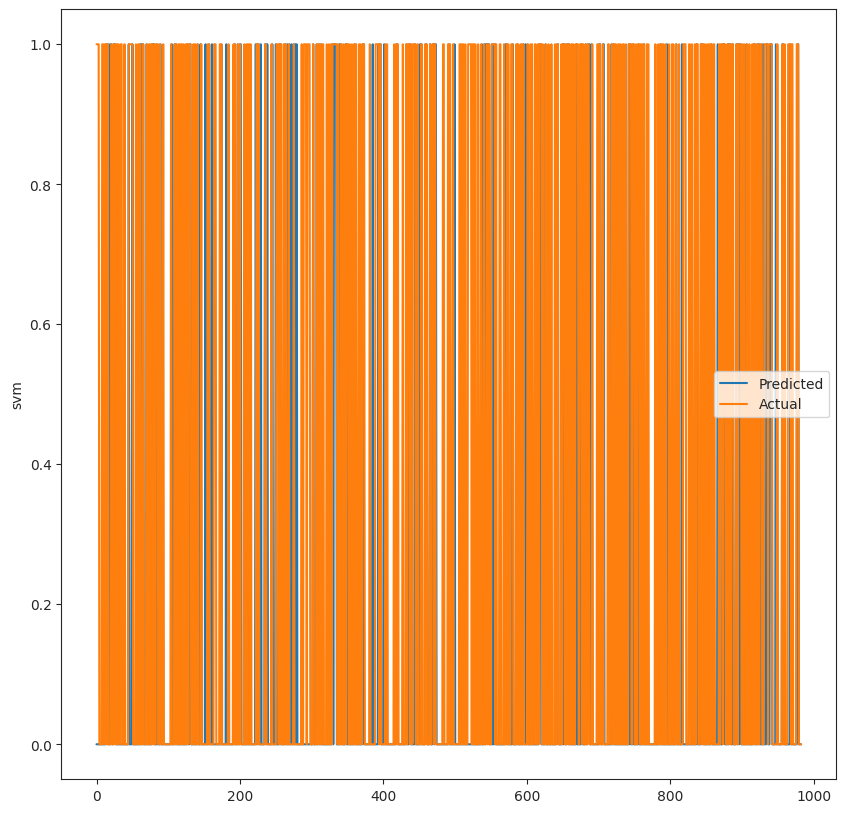

RF


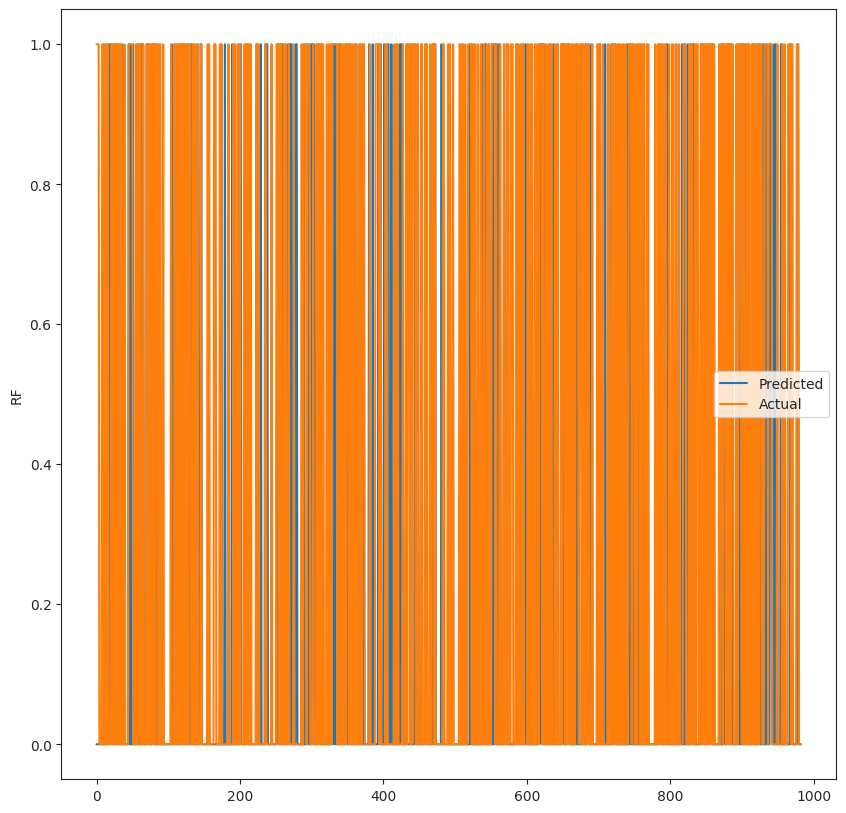

KNN


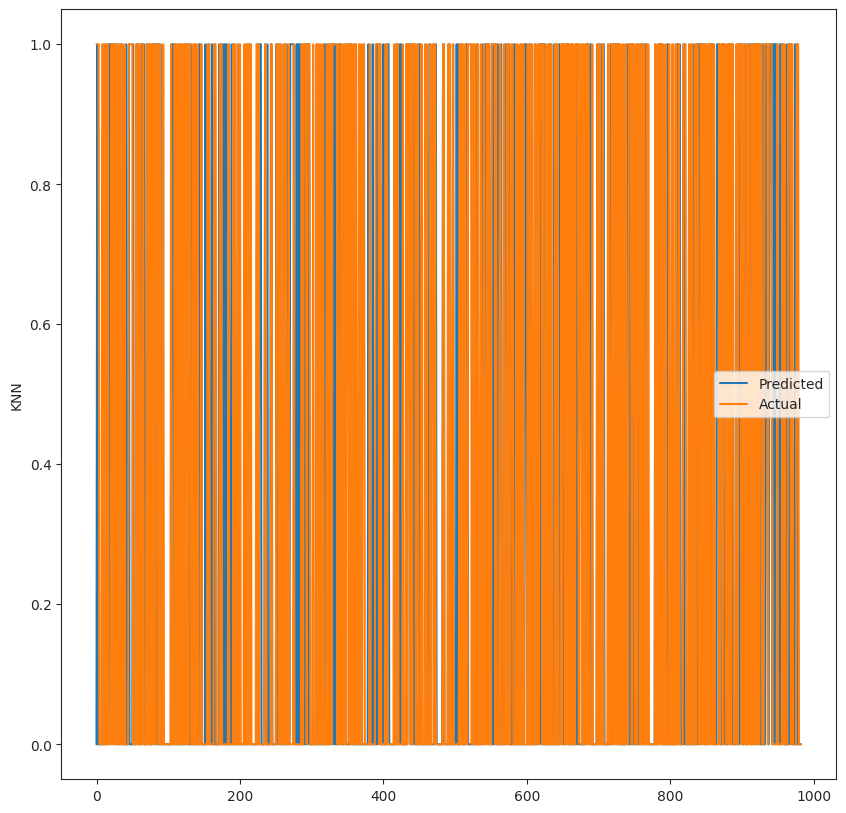

In [157]:
for index, tup in enumerate(trained_models):
  prepare_pred_plot(tup[0], tup[1])

svm


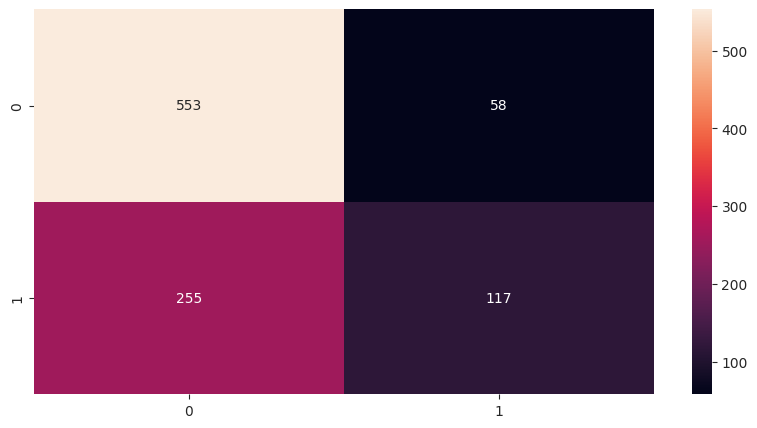

RF


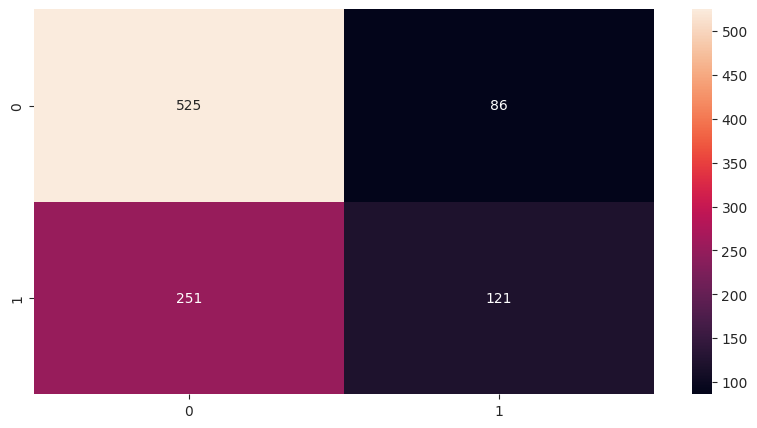

KNN


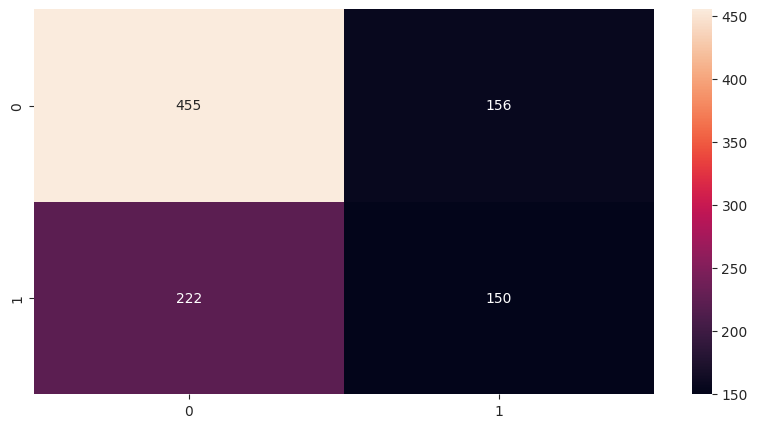

In [158]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [159]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

svm Report :
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       611
           1       0.67      0.31      0.43       372

    accuracy                           0.68       983
   macro avg       0.68      0.61      0.60       983
weighted avg       0.68      0.68      0.65       983



RF Report :
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       611
           1       0.58      0.33      0.42       372

    accuracy                           0.66       983
   macro avg       0.63      0.59      0.59       983
weighted avg       0.64      0.66      0.63       983



KNN Report :
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       611
           1       0.49      0.40      0.44       372

    accuracy                           0.62       983
   macro avg       0.58      0.57      0.57       983
weighted avg       0.60      0.6